In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data=pd.read_csv(r'C:\Users\HP\Downloads\employee.csv')
data


,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.shape

(9, 7)

In [6]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


Dataset is about performance score of  employees in different departments

# 2.Reset the index as "name" as the index.


In [7]:
data.set_index(['name'], inplace = True)

In [8]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3.Select rows for specific names Jack Morgan and Josh wills.

In [9]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4.Select data for multiple values "Sales" and “Finance”.


In [10]:
data_values = data[data['department'].isin(['Sales', 'Finance'])]

In [11]:
data_values

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [12]:
data1=data[(data.department=='Sales')|(data.department=='Finance')]
print(data1)

                age   income gender department grade  performance_score
name                                                                   
S Kumar         NaN  16000.0      F    Finance    G0                520
Jack Morgan    32.0  35000.0      M    Finance    G2                674
Ying Chin      45.0  65000.0      F      Sales    G3                556
Satyam Sharma   NaN  62000.0    NaN      Sales    G3                649
Josh Wills     54.0  52000.0      F    Finance    G3                901
Leo Duck       23.0  98000.0      M      Sales    G4                709


# 5. Display employee who has more than 700 performance score.

In [13]:
data[(data.performance_score>700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score


In [14]:
data3 = data[(data.performance_score>=500) & (data.performance_score<=700)]
data3

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7.Check and handle missing values in the dataset.

In [15]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [16]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [17]:
for i in ['age','income']:
      data[i]=data[i].fillna(data[i].median())

In [18]:
data.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [19]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

In [20]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

Data set is clean with no null values

# 8 Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Box plot of performance score')

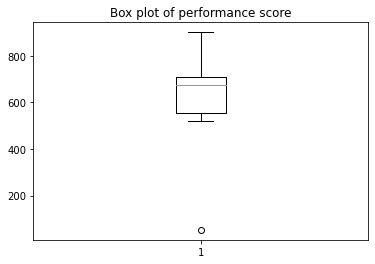

In [21]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance score')


In [22]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [23]:
IQR=Q3-Q1
IQR

155.0

In [24]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

323.5
943.5


In [25]:
outlier=[]
for x in data['performance_score']:
    if((x>up_limit)or (x<low_limit)):
         outlier.append(x)
outlier
            

[53]

In [26]:
ind1=data['performance_score']<low_limit
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [27]:
data.drop(['James Authur'],inplace=True)

In [28]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


Text(0.5, 1.0, 'Box plot of income')

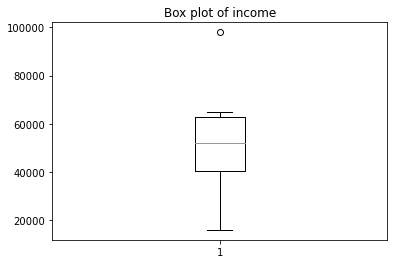

In [29]:
plt.boxplot(data['income'])
plt.title('Box plot of income')

Text(0.5, 1.0, 'Box plot of age')

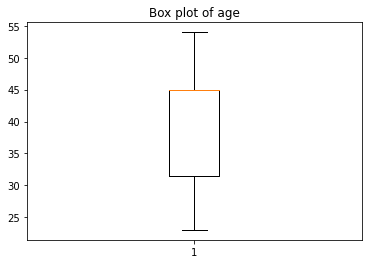

In [30]:
plt.boxplot(data['age'])
plt.title('Box plot of age')

No outliers for age

# 9.Check the gender column and do Dummy encoding.

In [31]:
data.gender.nunique()

2

In [32]:
pd.get_dummies(data.gender)

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


# 10..Do the standard scaling on the feature performance score

In [33]:
from sklearn.preprocessing import StandardScaler
X=data['performance_score']
X

name
Allen Smith      723
S Kumar          520
Jack Morgan      674
Ying Chin        556
Dheeraj Patel    711
Satyam Sharma    649
Josh Wills       901
Leo Duck         709
Name: performance_score, dtype: int64

In [34]:
pd_data=pd.DataFrame(X)

In [35]:
scaler = StandardScaler()

In [36]:
pd_data[["performance_score"]]= scaler.fit_transform(pd_data[["performance_score"]])

In [37]:
print(pd_data)

               performance_score
name                            
Allen Smith             0.392262
S Kumar                -1.475872
Jack Morgan            -0.058667
Ying Chin              -1.144578
Dheeraj Patel           0.281831
Satyam Sharma          -0.288733
Josh Wills              2.030331
Leo Duck                0.263425
